/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100


/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.1375 - loss: 2.0208 - val_accuracy: 0.1163 - val_loss: 1.9414
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.1868 - loss: 1.9196 - val_accuracy: 0.1395 - val_loss: 1.9551
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.2412 - loss: 1.9243 - val_accuracy: 0.2558 - val_loss: 1.9511
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.1833 - loss: 1.9128 - val_accuracy: 0.1395 - val_loss: 1.9589
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.3192 - loss: 1.8495 - val_accuracy: 0.2558 - val_loss: 1.9704
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.2822 - loss: 1.8669 - val_accuracy: 0.1628 - val_loss: 1.9409
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.3189 - loss: 1.7942 - val_accuracy: 0.2093 - val_loss: 1.9391
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.2826 - loss: 1.7638 - val_accuracy: 0.2558 - val_loss: 1.8

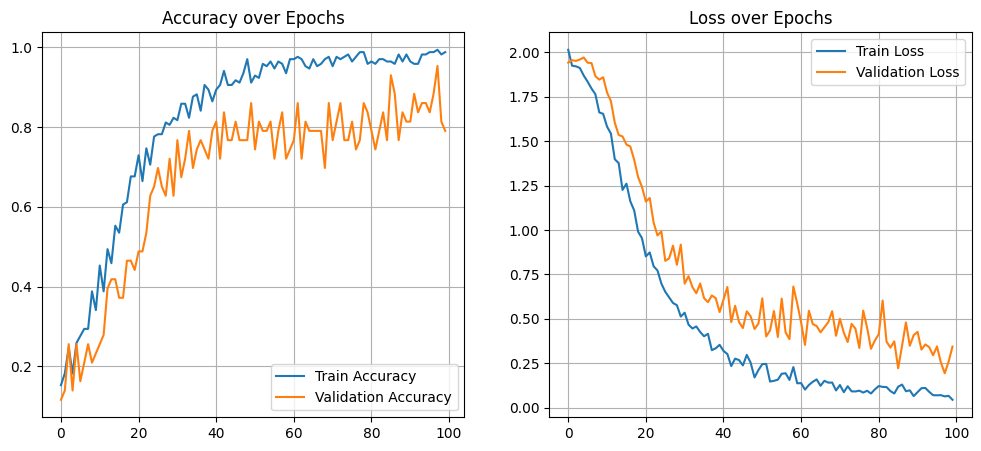

In [8]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    # Set seed for data augmentation
    tf.keras.utils.set_random_seed(seed)
    # Ensure deterministic behavior in TensorFlow
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

# Define the path to the dataset folder
dataset_folder = '/Users/Downloads/linda/JAFFE Dataset'

# Function to load images and labels
def load_images_and_labels(folder):
    images = []
    labels = []
    label_map = {
        "AN": "anger",
        "DI": "disgust",
        "FE": "fear",
        "HA": "happiness",
        "SA": "sadness",
        "SU": "surprise",
        "NE": "neutral"
    }
    for filename in os.listdir(folder):
        if filename.endswith('.tiff'):
            image_file = os.path.join(folder, filename)
            img = Image.open(image_file).convert('L')
            img = img.resize((64, 64))  # Resize to 64x64 for consistency
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            label_code = filename.split('.')[1][:2]
            labels.append(label_map[label_code])
    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(dataset_folder)
images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    shear_range=0.2
)
datagen.fit(X_train)

# Model configuration
model = Sequential([
    InputLayer(input_shape=(64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, verbose=1, validation_data=(X_test, y_test))

# Model evaluation
_, accuracy = model.evaluate(X_test, y_test)
print(f'Final Test Accuracy: {accuracy * 100:.2f}%')

# Plotting the training progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

plt.show()


/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1214 - loss: 7.4521

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.1462 - loss: 7.6141
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.1701 - loss: 2.0259
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.1428 - loss: 1.9445
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2015 - loss: 1.9206
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.1672 - loss: 1.9284
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3085 - loss: 1.8996
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3004 - loss: 1.8101
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3718 - loss: 1.6882
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4172 - loss: 1.5654
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5533 - loss: 1.3405
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5827 - loss: 1.3928
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6634 - loss: 1.0523
Epoch 13

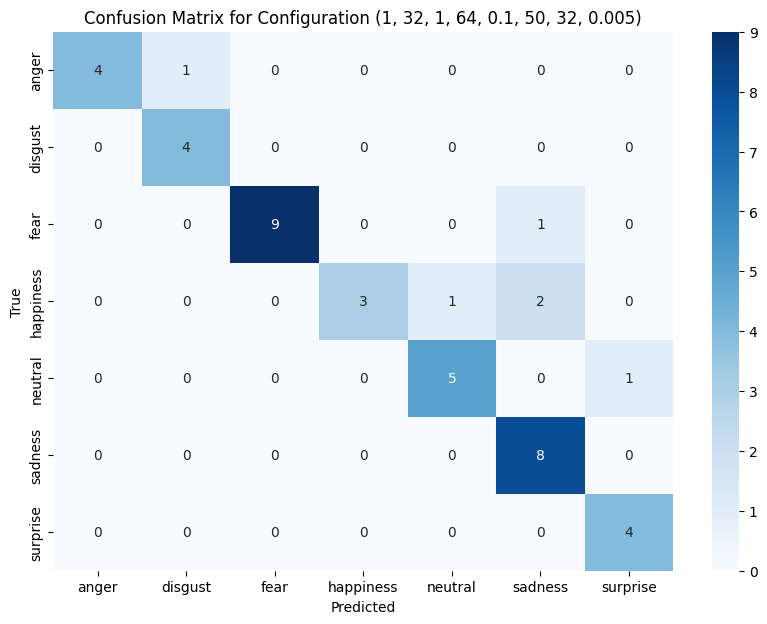

Epoch 1/100


/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1000 - loss: 1.8808

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1540 - loss: 5.0665
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1671 - loss: 2.3645
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1768 - loss: 2.0561
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1763 - loss: 1.9033
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2771 - loss: 1.8867
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2458 - loss: 1.8719
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2336 - loss: 1.8607
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.2311 - loss: 1.8440
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.2823 - loss: 1.8009
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.2464 - loss: 1.7901
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3164 - loss: 1.7218
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2429 - loss: 1.7034
E

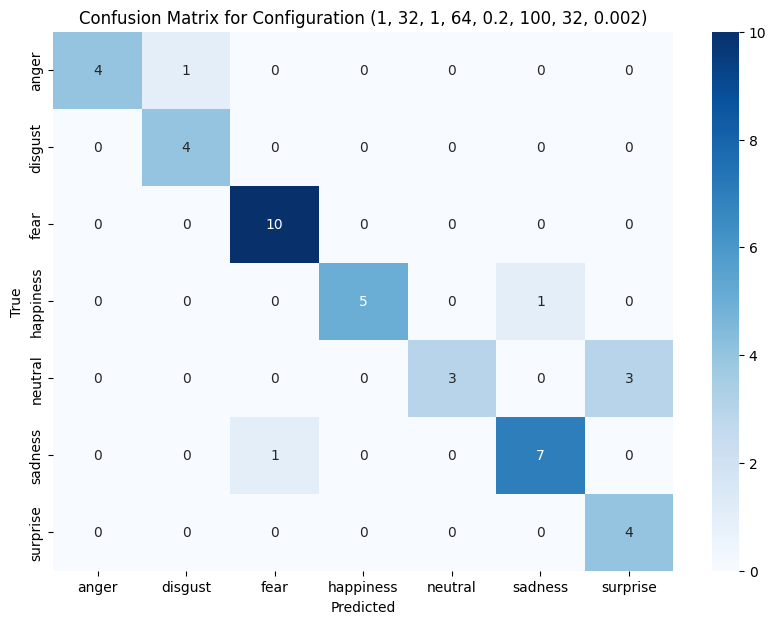

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.2188 - loss: 1.9232

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.1470 - loss: 4.4952
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.1838 - loss: 2.0436
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.1604 - loss: 1.9767
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.2201 - loss: 1.9186
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.2015 - loss: 1.9068
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.2175 - loss: 1.8813
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.3267 - loss: 1.8289
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.3858 - loss: 1.7581
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3614 - loss: 1.6852
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4764 - loss: 1.5889
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5734 - loss: 1.3951
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4617 - loss: 1.3931
Epoch 1

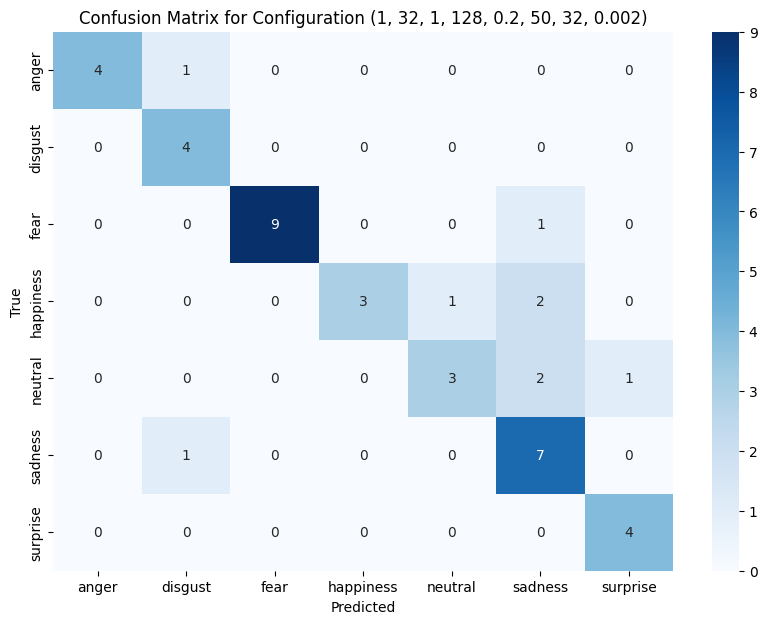

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0938 - loss: 2.0415

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.1131 - loss: 6.6629
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.1302 - loss: 2.2364
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.1662 - loss: 1.9400
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.1598 - loss: 1.9535
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.2556 - loss: 1.9395
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.1421 - loss: 1.9479
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.1835 - loss: 1.9298
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.1680 - loss: 1.9292
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.2218 - loss: 1.9041
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.1970 - loss: 1.8607
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.2691 - loss: 1.8245
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.2852 - loss: 1.739

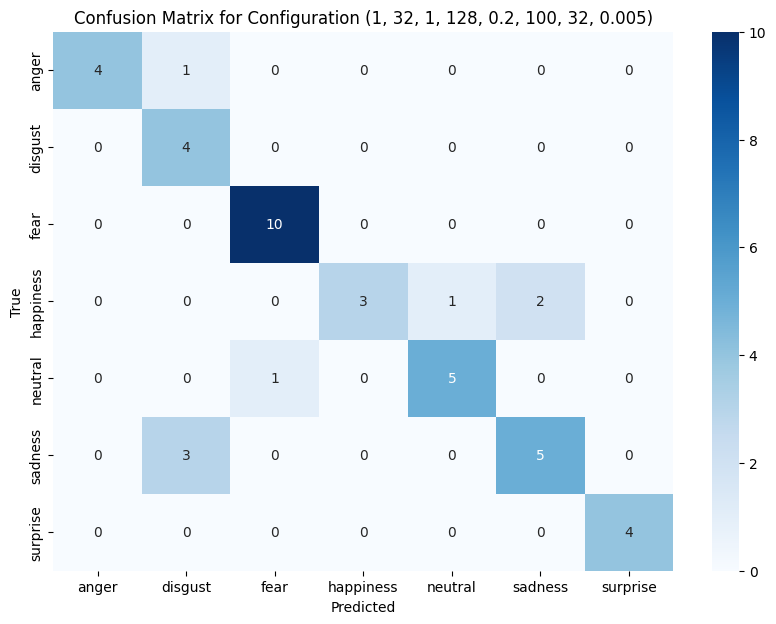

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1562 - loss: 1.9458

/Users/arkamandol/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.1498 - loss: 3.2522
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.1461 - loss: 2.1710
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.1387 - loss: 1.9394
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.2565 - loss: 1.8636
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.2494 - loss: 1.8280
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3514 - loss: 1.7545
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3769 - loss: 1.6658
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.3654 - loss: 1.6180
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.4509 - loss: 1.4882
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5328 - loss: 1.4042
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5157 - loss: 1.3159
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5677 - loss: 1.2

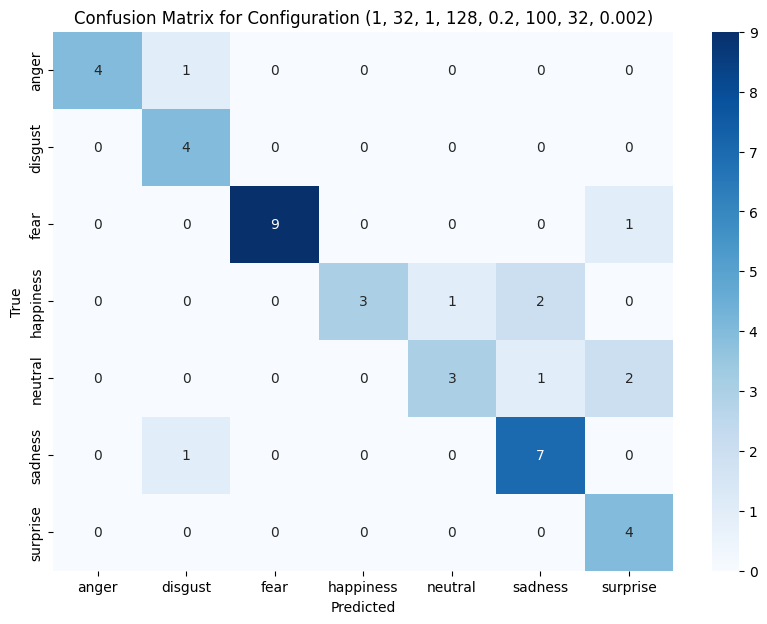

In [6]:
import numpy as np
import os
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set seeds for reproducibility
def set_seeds(seed=1):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

# Define the path to the dataset folder
dataset_folder = '/Users/Downloads/linda/JAFFE Dataset'

# Function to load images and labels
def load_images_and_labels(folder):
    images = []
    labels = []
    label_map = {
        "AN": "anger",
        "DI": "disgust",
        "FE": "fear",
        "HA": "happiness",
        "SA": "sadness",
        "SU": "surprise",
        "NE": "neutral"
    }
    for filename in os.listdir(folder):
        if filename.endswith('.tiff'):
            image_file = os.path.join(folder, filename)
            img = Image.open(image_file).convert('L')
            img = img.resize((64, 64))  # Resize to 64x64 for consistency
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            label_code = filename.split('.')[1][:2]
            labels.append(label_map[label_code])

    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(dataset_folder)
images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Configurations provided
configs = [
    (1, 32, 1, 64, 0.1, 50, 32, 0.005),
    (1, 32, 1, 64, 0.2, 100, 32, 0.002),
    (1, 32, 1, 128, 0.2, 50, 32, 0.002),
    (1, 32, 1, 128, 0.2, 100, 32, 0.005),
    (1, 32, 1, 128, 0.2, 100, 32, 0.002)
]

# Data augmentation
datagen = ImageDataGenerator(shear_range=0.2)
datagen.fit(X_train)

for config in configs:
    conv_layers, filters, dense_layers, dense_units, dropout, epochs, batch_size, learning_rate = config
    try:
        model = Sequential()
        model.add(InputLayer(input_shape=(64, 64, 1)))

        # Adding convolutional layers
        for _ in range(conv_layers):
            model.add(Conv2D(filters, (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())

        # Adding dense layers
        for _ in range(dense_layers):
            model.add(Dense(dense_units, activation='relu'))

        model.add(Dropout(dropout))
        model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

        # Define the optimizer with a custom learning rate
        optimizer = Adam(learning_rate=learning_rate)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Fit model
        model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, verbose=1)

        # Evaluate the model
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred_classes)
        precision = precision_score(y_true, y_pred_classes, average='weighted')
        recall = recall_score(y_true, y_pred_classes, average='weighted')
        f1 = f1_score(y_true, y_pred_classes, average='weighted')
        report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)

        print(f"\nConfiguration: {config}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("\nClassification Report:\n", report)

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_true, y_pred_classes)
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f'Confusion Matrix for Configuration {config}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    except Exception as e:
        print(f"An error occurred with configuration {config}: {e}")


In [1]:
import numpy as np
import os
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import warnings

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    # Set seed for data augmentation
    tf.keras.utils.set_random_seed(seed)
    # Ensure deterministic behavior in TensorFlow
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
tf.get_logger().setLevel('ERROR')

# Define the path to the dataset folder
dataset_folder = '/Users/Downloads/linda/JAFFE Dataset'

# Function to load images and labels
def load_images_and_labels(folder):
    images = []
    labels = []
    label_map = {
        "AN": "anger",
        "DI": "disgust",
        "FE": "fear",
        "HA": "happiness",
        "SA": "sadness",
        "SU": "surprise",
        "NE": "neutral"
    }
    for filename in os.listdir(folder):
        if filename.endswith('.tiff'):
            image_file = os.path.join(folder, filename)
            img = Image.open(image_file).convert('L')
            img = img.resize((64, 64))  # Resize to 64x64 for consistency
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            label_code = filename.split('.')[1][:2]
            labels.append(label_map[label_code])

    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(dataset_folder)
images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Parameter combinations using itertools.product
conv_layers_options = [1, 2]
filters_options = [32, 64]
dense_layers_options = [1, 2]
dense_units_options = [64, 128]
dropout_options = [0.1, 0.2, 0.3]
epochs_options = [50]
batch_size_options = [32, 64]
learning_rate_options = [0.001, 0.002]  # Different learning rates

# Data augmentation
datagen = ImageDataGenerator(shear_range=0.2)
datagen.fit(X_train)

# Generate all configurations
configurations = list(itertools.product(conv_layers_options, filters_options, dense_layers_options,
                                        dense_units_options, dropout_options, epochs_options,
                                        batch_size_options, learning_rate_options))

best_accuracy = 0
best_configuration = None

for config in configurations:
    print(config)
    conv_layers, filters, dense_layers, dense_units, dropout, epochs, batch_size, learning_rate = config
    try:
        model = Sequential()
        model.add(InputLayer(input_shape=(64, 64, 1)))

        # Adding convolutional layers
        for _ in range(conv_layers):
            model.add(Conv2D(filters, (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())

        # Adding dense layers
        for _ in range(dense_layers):
            model.add(Dense(dense_units, activation='relu'))

        model.add(Dropout(dropout))
        model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

        # Define the optimizer with a custom learning rate
        optimizer = Adam(learning_rate=learning_rate)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Fit model
        model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, verbose=0)

        # Evaluate the model
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Calculate metrics
        precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred_classes, average='weighted')
        f1 = f1_score(y_true, y_pred_classes, average='weighted')

        # Check for best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_configuration = config

        # Print results with variable names
        print(f"Tested Configuration: conv_layers={conv_layers}, filters={filters}, dense_layers={dense_layers}, "
              f"dense_units={dense_units}, dropout={dropout}, epochs={epochs}, batch_size={batch_size}, "
              f"learning_rate={learning_rate}")
        print(f"Accuracy: {accuracy * 100:.2f}%, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    except Exception as e:
        pass

print(f"Final Best Configuration: {best_configuration}")
print(f"Final Best Accuracy: {best_accuracy * 100:.2f}%")


(1, 32, 1, 64, 0.1, 50, 32, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch_size=32, learning_rate=0.001
Accuracy: 86.05%, Precision: 0.8791, Recall: 0.8605, F1 Score: 0.8610

(1, 32, 1, 64, 0.1, 50, 32, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 51.16%, Precision: 0.4120, Recall: 0.5116, F1 Score: 0.4480

(1, 32, 1, 64, 0.1, 50, 64, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch_size=64, learning_rate=0.001
Accuracy: 72.09%, Precision: 0.8101, Recall: 0.7209, F1 Score: 0.7221

(1, 32, 1, 64, 0.1, 50, 64, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_unit

2024-08-10 00:54:18.336690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9522: Filling up shuffle buffer (this may take a while): 3 of 8
2024-08-10 00:54:18.365543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tested Configuration: conv_layers=2, filters=32, dense_layers=1, dense_units=128, dropout=0.2, epochs=50, batch_size=32, learning_rate=0.001
Accuracy: 79.07%, Precision: 0.8671, Recall: 0.7907, F1 Score: 0.7845

(2, 32, 1, 128, 0.2, 50, 32, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Tested Configuration: conv_layers=2, filters=32, dense_layers=1, dense_units=128, dropout=0.2, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 69.77%, Precision: 0.8005, Recall: 0.6977, F1 Score: 0.6996

(2, 32, 1, 128, 0.2, 50, 64, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tested Configuration: conv_layers=2, filters=32, dense_layers=1, dense_units=128, dropout=0.2, epochs=50, batch_size=64, learning_rate=0.001
Accuracy: 72.09%, Precision: 0.8294, Recall: 0.7209, F1 Score: 0.7198

(2, 32, 1, 128, 0.2, 50, 64, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Tested Configuration: conv_layers=2, filters=32, dense_layers=1, dense_units=128, dropout=0.2, epochs=50

In [2]:
import numpy as np
import os
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import warnings

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    # Set seed for data augmentation
    tf.keras.utils.set_random_seed(seed)
    # Ensure deterministic behavior in TensorFlow
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
tf.get_logger().setLevel('ERROR')

# Define the path to the dataset folder
dataset_folder = '/Users/Downloads/linda_trials/JAFFE Dataset'

# Function to load images and labels
def load_images_and_labels(folder):
    images = []
    labels = []
    label_map = {
        "AN": "anger",
        "DI": "disgust",
        "FE": "fear",
        "HA": "happiness",
        "SA": "sadness",
        "SU": "surprise",
        "NE": "neutral"
    }
    for filename in os.listdir(folder):
        if filename.endswith('.tiff'):
            image_file = os.path.join(folder, filename)
            img = Image.open(image_file).convert('L')
            img = img.resize((64, 64))  # Resize to 64x64 for consistency
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            label_code = filename.split('.')[1][:2]
            labels.append(label_map[label_code])

    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(dataset_folder)
images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Parameter combinations using itertools.product
conv_layers_options = [1, 2]
filters_options = [32, 64]
dense_layers_options = [1, 2]
dense_units_options = [64, 128]
dropout_options = [0.1, 0.2, 0.3]
epochs_options = [50]
batch_size_options = [32, 64]
learning_rate_options = [0.001, 0.002, 0.005]  # Different learning rates

# Data augmentation
datagen = ImageDataGenerator(shear_range=0.2)
datagen.fit(X_train)

# Generate all configurations
configurations = (
    (2, 32, 2, 64, 0.2, 50, 32, 0.002),
    
)

"""Tested Configuration: conv_layers=2, filters=32, dense_layers=2, dense_units=128, dropout=0.1, epochs=50, batch_size=32, learning_rate=0.001
Accuracy: 93.02%, Precision: 0.9442, Recall: 0.9302, F1 Score: 0.9284
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Tested Configuration: conv_layers=2, filters=32, dense_layers=2, dense_units=128, dropout=0.1, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 90.70%, Precision: 0.9209, Recall: 0.9070, F1 Score: 0.9079"""
best_accuracy = 0
best_configuration = None

for config in configurations:
    conv_layers, filters, dense_layers, dense_units, dropout, epochs, batch_size, learning_rate = config
    try:
        model = Sequential()
        model.add(InputLayer(input_shape=(64, 64, 1)))

        # Adding convolutional layers
        for _ in range(conv_layers):
            model.add(Conv2D(filters, (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())

        # Adding dense layers
        for _ in range(dense_layers):
            model.add(Dense(dense_units, activation='relu'))

        model.add(Dropout(dropout))
        model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

        # Define the optimizer with a custom learning rate
        optimizer = Adam(learning_rate=learning_rate)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Fit model
        model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, verbose=0)

        # Evaluate the model
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Calculate metrics
        precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred_classes, average='weighted')
        f1 = f1_score(y_true, y_pred_classes, average='weighted')

        # Check for best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_configuration = config

        # Print results with variable names
        print(f"Tested Configuration: conv_layers={conv_layers}, filters={filters}, dense_layers={dense_layers}, "
              f"dense_units={dense_units}, dropout={dropout}, epochs={epochs}, batch_size={batch_size}, "
              f"learning_rate={learning_rate}")
        print(f"Accuracy: {accuracy * 100:.2f}%, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    except Exception as e:
        pass

print(f"Final Best Configuration: {best_configuration}")
print(f"Final Best Accuracy: {best_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tested Configuration: conv_layers=2, filters=32, dense_layers=2, dense_units=64, dropout=0.2, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 81.40%, Precision: 0.8837, Recall: 0.8140, F1 Score: 0.8203

Final Best Configuration: (2, 32, 2, 64, 0.2, 50, 32, 0.002)
Final Best Accuracy: 81.40%


In [5]:
import numpy as np
import os
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import warnings

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
tf.get_logger().setLevel('ERROR')

# Define the path to the dataset folder
dataset_folder = '/Users/Downloads/linda/JAFFE Dataset'

# Function to load images and labels
def load_images_and_labels(folder):
    images = []
    labels = []
    label_map = {
        "AN": "anger",
        "DI": "disgust",
        "FE": "fear",
        "HA": "happiness",
        "SA": "sadness",
        "SU": "surprise",
        "NE": "neutral"
    }
    for filename in os.listdir(folder):
        if filename.endswith('.tiff'):
            image_file = os.path.join(folder, filename)
            img = Image.open(image_file).convert('L')
            img = img.resize((64, 64))  # Resize to 64x64 for consistency
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            label_code = filename.split('.')[1][:2]
            labels.append(label_map[label_code])
    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(dataset_folder)
images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Data augmentation with shear_range
datagen = ImageDataGenerator(shear_range=0.2)
datagen.fit(X_train)

# Generate all configurations
configurations = list(itertools.product([1, 2], [32, 64], [1, 2], [64, 128], [0.1, 0.2, 0.3], [50], [32, 64], [0.001, 0.002]))

best_accuracy = 0
best_configuration = None

for config in configurations:
    conv_layers, filters, dense_layers, dense_units, dropout, epochs, batch_size, learning_rate = config
    model = Sequential()
    model.add(InputLayer(input_shape=(64, 64, 1)))
    for _ in range(conv_layers):
        model.add(Conv2D(filters, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for _ in range(dense_layers):
        model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(datagen.flow(X_train, y_train, batch_size=batch_size, seed=42), epochs=epochs, verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')

    # Print tested configuration and its metrics
    print(f"Tested Configuration: conv_layers={conv_layers}, filters={filters}, dense_layers={dense_layers}, "
          f"dense_units={dense_units}, dropout={dropout}, epochs={epochs}, batch_size={batch_size}, "
          f"learning_rate={learning_rate}")
    print(f"Accuracy: {accuracy * 100:.2f}%, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")
    print(config)

    # Check for best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_configuration = config

print(f"Final Best Configuration: {best_configuration}")
print(f"Final Best Accuracy: {best_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch_size=32, learning_rate=0.001
Accuracy: 65.12%, Precision: 0.7916, Recall: 0.6512, F1 Score: 0.6564

(1, 32, 1, 64, 0.1, 50, 32, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 23.26%, Precision: 0.1791, Recall: 0.2326, F1 Score: 0.1503

(1, 32, 1, 64, 0.1, 50, 32, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch_size=64, learning_rate=0.001
Accuracy: 58.14%, Precision: 0.7256, Recall: 0.5814, F1 Score: 0.5852

(1, 32, 1, 64, 0.1, 50, 64, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Tested Configuration: conv_layers=1, filters=32, dense_layers=1, dense_units=64, dropout=0.1, epochs=50, batch

2024-08-10 08:54:26.349131: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:31888: Filling up shuffle buffer (this may take a while): 2 of 8
2024-08-10 08:54:26.383976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=1, dense_units=128, dropout=0.3, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 76.74%, Precision: 0.8351, Recall: 0.7674, F1 Score: 0.7717

(2, 64, 1, 128, 0.3, 50, 32, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=1, dense_units=128, dropout=0.3, epochs=50, batch_size=64, learning_rate=0.001
Accuracy: 79.07%, Precision: 0.8863, Recall: 0.7907, F1 Score: 0.8066

(2, 64, 1, 128, 0.3, 50, 64, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=1, dense_units=128, dropout=0.3, epochs=50, batch_size=64, learning_rate=0.002
Accuracy: 74.42%, Precision: 0.8760, Recall: 0.7442, F1 Score: 0.7614

(2, 64, 1, 128, 0.3, 50, 64, 0.002)
2/2 ━━━━━━━━━━━━━━━━━━━━ 991s 991s/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=2, dense_units=64, dropout=0.1, epochs=5

2024-08-10 13:27:05.236378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:32483: Filling up shuffle buffer (this may take a while): 1 of 8
2024-08-10 13:27:05.263190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=2, dense_units=64, dropout=0.2, epochs=50, batch_size=32, learning_rate=0.001
Accuracy: 74.42%, Precision: 0.8512, Recall: 0.7442, F1 Score: 0.7350

(2, 64, 2, 64, 0.2, 50, 32, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=2, dense_units=64, dropout=0.2, epochs=50, batch_size=32, learning_rate=0.002
Accuracy: 81.40%, Precision: 0.8703, Recall: 0.8140, F1 Score: 0.8140

(2, 64, 2, 64, 0.2, 50, 32, 0.002)


2024-08-10 14:06:34.965545: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:32653: Filling up shuffle buffer (this may take a while): 1 of 8
2024-08-10 14:06:34.988119: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=2, dense_units=64, dropout=0.2, epochs=50, batch_size=64, learning_rate=0.001
Accuracy: 79.07%, Precision: 0.8708, Recall: 0.7907, F1 Score: 0.7986

(2, 64, 2, 64, 0.2, 50, 64, 0.001)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Tested Configuration: conv_layers=2, filters=64, dense_layers=2, dense_units=64, dropout=0.2, epochs=50, batch_size=64, learning_rate=0.002
Accuracy: 79.07%, Precision: 0.8434, Recall: 0.7907, F1 Score: 0.7881

(2, 64, 2, 64, 0.2, 50, 64, 0.002)



KeyboardInterrupt

